In [1]:
import os

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'bsw':0.3,
        'slope':[2e-5,1e-7],
        'fluid_rate':1000,
        'gor':0.3
    },
    'start':'2021-01-01',
    'end':'2022-01-01',
    'freq_input':'M',
    'freq_output':'M',
    'cashflow_params':[
            {
                'name':'fix_opex',
                'const_value':-5000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-5,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':60,
                'target':'income',
                'multiply':'oil_volume'
            }
        ]
}

p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Wor(bsw=0.3, slope=[1e-05, 1e-07], fluid_rate=1000.0, ti=datetime.date(2021, 1, 1), seed=None, gor=0.3, glr=None), start=datetime.date(2021, 1, 1), end=datetime.date(2022, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', iter=1, const_value=-5000.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', iter=1, const_value=-5.0, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', iter=1, const_value=60.0, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None)

In [3]:
f1 = p1.generate_forecast()
f1.head()

,oil_rate,water_rate,oil_cum,water_cum,bsw,wor,wor_1,delta_time,fluid_rate,fluid_cum,iteration,oil_volume,water_volume,gas_cum,gas_volume,gas_rate,period
date,,,,,,,,,,,,,,,,,
2021-01,7.000000e+02,300.000000,651000.000000,2.790000e+05,0.300000,4.285714e-01,1.428571e+00,31,30000.0,930000.0,0,651000.000000,279000.000000,195300.000000,1.953000e+05,6.300000e+03,pdp
2021-02,1.041936e+00,998.958064,651875.226077,1.118125e+06,0.998958,9.587520e+02,9.597520e+02,28,30000.0,1770000.0,0,875.226077,839124.773923,195562.567823,2.625678e+02,9.377422e+00,pdp
2021-03,1.537386e-03,999.998463,651876.655846,2.048123e+06,0.999998,6.504539e+05,6.504549e+05,31,30000.0,2700000.0,0,1.429769,929998.570231,195562.996754,4.289306e-01,1.383647e-02,pdp
2021-04,2.268394e-06,999.999998,651876.657887,2.948123e+06,1.000000,4.408405e+08,4.408405e+08,30,30000.0,3600000.0,0,0.002042,899999.997958,195562.997366,6.124664e-04,2.041555e-05,pdp
2021-05,3.346989e-09,1000.000000,651876.657890,3.878123e+06,1.000000,2.987761e+11,2.987761e+11,31,30000.0,4530000.0,0,0.000003,929999.999997,195562.997367,9.338255e-07,3.012340e-08,pdp


In [4]:
p1.get_end_dates()


[datetime.date(2021, 12, 1), datetime.date(2021, 12, 1)]

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

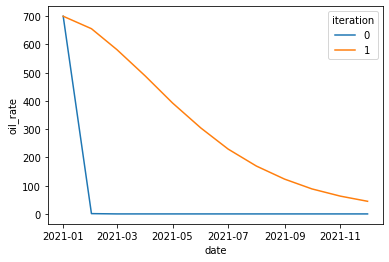

In [5]:
sns.lineplot(data=f1,x=f1.index.to_timestamp(),y='oil_rate', hue='iteration')

In [6]:
p1.generate_cashflow()

[CashFlowModel(name='pdp_0', income=[CashFlow(name='income', const_value=[39060000.0, 52513.56462953612, 85.78612006735057, 0.12249327264726162, 0.00018676277250051498, 2.654269337654114e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None)], opex=[CashFlow(name='fix_opex', const_value=-5000.0, start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None), CashFlow(name='var_opex', const_value=[-3255000.0, -4376.130385794677, -7.1488433389458805, -0.010207772720605135, -1.5563564375042915e-05, -2.2118911147117615e-08, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None)], capex=None),
 CashFlowModel(name='pdp_1', income=[CashFlow(name='income', const_value=[39060000.0, 33056434.299237184, 32453388.77250053

In [7]:
p1.cashflow[1].npv([0.05,0.1,0.15])

,npv
0.05,1.660506e+08
0.10,1.469967e+08
0.15,1.323778e+08


In [8]:
p1.cashflow[1].irr()

nan